In [85]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [88]:
def pltImage(img):
    channels = len(img.shape)
    if channels == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
    plt.show()
    
plt.rcParams['figure.figsize'] = (10,5)

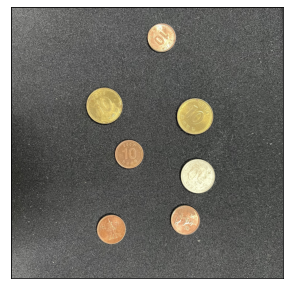

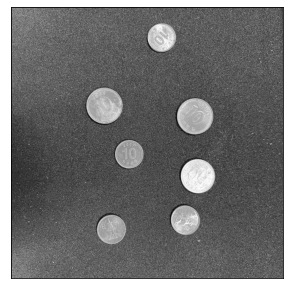

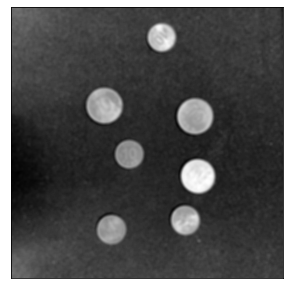

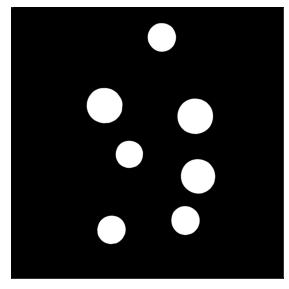

In [100]:
img = cv2.imread('coin.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(img_gray, (45, 45), 16)
#상황에 맞는 threshold 사용
#thresh = cv2.adaptiveThreshold(blur, 0, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 5, 1)
ret, th = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

pltImage(img)
pltImage(img_gray)
pltImage(blur)
pltImage(th)

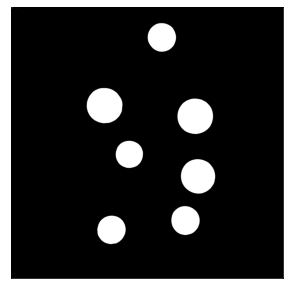

In [101]:
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel, iterations = 3)

pltImage(closing)

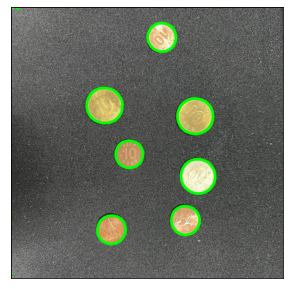

In [102]:
cont_img = closing.copy()
contours, hierarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contour = cv2.drawContours(img, contours, -1, (0, 255, 0), 30)
pltImage(img_contour)

In [103]:
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 2000 or area > 4000:
        continue
        
    if len(cnt) < 5:
        continue
        
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img, ellipse, (255, 0, 0), 2)

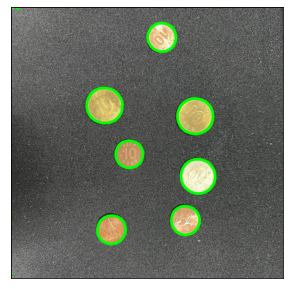

In [104]:
pltImage(img)